# 여친 선물 검색해서 워드 클라우드 만들기

### 네이버 지식인 Crawling

In [9]:
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

In [10]:
from urllib.parse import quote
import math

In [11]:
driver = webdriver.Chrome('../05.Crawling/chromedriver')
search = quote('여친 선물')
kin_url = 'https://kin.naver.com/search/list.nhn'

#### 개별적으로 돌려보기

In [4]:
url = f'{kin_url}?query={search}&page=1'
driver.get(url)
time.sleep(1)

ul = driver.find_element_by_css_selector('.basic1')
lis = ul.find_elements_by_tag_name('li')
ans_href_list = []
for li in lis:
    atag = li.find_element_by_tag_name('a')
    ans_href = atag.get_attribute('href')
    ans_href_list.append(ans_href)

In [6]:
driver.get(ans_href_list[0])
time.sleep(1)
count = int(driver.find_element_by_css_selector('._answerCount.num').text)
count

12

In [7]:
for next in range(math.floor((count-1)/5)):
    more = driver.find_element_by_id('nextPageButton')
    more.click()
    time.sleep(1)

In [8]:
answers = driver.find_elements_by_css_selector('._endContentsText.c-heading-answer__content-user')
for i, answer in enumerate(answers):
    print(f'{i}==================================================')
    print(answer.text)

0==================================================
반지!목걸이!!!!!!!!
1==================================================
커플 가디건이나 커플 모자는 어떠신지요 :-)
몇개 추천제품들 투척하고 갑니다 ㅎㅎ
더클래식 남녀 커플룩 오버핏 빅사이즈 하프 니트 가디건
COUPANG
coupa.ng
남녀공용 체크 라인 오버핏 가디건 커플룩
COUPANG
coupa.ng
로파웨어 커플 오버핏 가디건 남자 여자 봄 가을 겨울 루즈핏 니트(DUHV4423)
COUPANG
coupa.ng
남녀공용 커플 오버핏 스냅 가디건
COUPANG
coupa.ng
남녀공용 오버핏 커플 패턴 니트 가디건 3컬러
COUPANG
coupa.ng
인기신상 남여 가을겨울 오버핏 세련된 V넥 니트가디건 커플가디건
COUPANG
coupa.ng
남녀공용 오버핏 체크 브이넥 버튼 커플 가디건 2컬러
COUPANG
coupa.ng
남여공용 아우터 루즈핏 타이드 카라 커플룩 가디건
COUPANG
coupa.ng
레인보우 영문레터링 포인트 블랙볼캡 커플모자 야구모자
COUPANG
coupa.ng
혹은 브랜드 있는 모자들 추천드려요!@
쇼핑에 성공하시길 바라며, 
도움이 되셨다면 채택 부탁드려요 ✿˘◡˘✿
파트너스커미션을 지급 받을 수 있습니다.
2==================================================
https://m.smartstore.naver.com/s0ul/products/5182838896
97샵 별수호자돼지 디퓨저<핸드메이드> : 97샵
[97샵] 공장 상품이 아닌 재구매율97% 한번 구매하면 또 돌아오실거에요 !
m.smartstore.naver.com
개지림 저 믿어보셈 
3==================================================
마크곤잘레스 후드티 추천드립니다.
스몰 사인 로고 후디 그레이
cay.kr
4================

#### 1 ~ 10 페이지 한꺼번에 돌리기

In [12]:
gift_text = ''
for page in range(1,11):
    url = f'{kin_url}?query={search}&page={page}'
    driver.get(url)
    print(page, end=' ')
    time.sleep(1)

    ul = driver.find_element_by_css_selector('.basic1')
    lis = ul.find_elements_by_tag_name('li')

    ans_href_list = []
    for li in lis:
        atag = li.find_element_by_tag_name('a')
        ans_href = atag.get_attribute('href')
        ans_href_list.append(ans_href)
    time.sleep(1)

    for ans_href in ans_href_list:
        driver.get(ans_href)
        time.sleep(1)
        count = int(driver.find_element_by_css_selector('._answerCount.num').text)
        #print(count)
        for next in range(math.floor((count-1)/5)):
            more = driver.find_element_by_id('nextPageButton')
            more.click()
            time.sleep(1)

        answers = driver.find_elements_by_class_name('_endContentsText.c-heading-answer__content-user')
        for answer in answers:
            #print('#', sep='', end='')
            gift_text += '\n' + answer.text
        #print()
        time.sleep(1)

1 2 3 4 5 6 7 8 9 10 

In [13]:
file = open('./results/gift.txt', 'w', encoding='utf-8')
file.write(gift_text)
file.close()

### 명사 추출하기

In [14]:
gift_text = open('./results/gift.txt', encoding='utf-8').read()

In [15]:
from konlpy.tag import Okt
okt = Okt()

In [16]:
tokens = okt.nouns(gift_text)
tokens[:10]

['반지', '목걸이', '커플', '가디건', '커플', '모자', '신지', '몇개', '추천', '제품']

In [17]:
# 영문자, 숫자 제거
import re
new_gift_text = []
for token in tokens:
    text = re.sub('[a-zA-Z0-9]', '', token)
    new_gift_text.append(text)

In [18]:
new_gift_text[:10]

['반지', '목걸이', '커플', '가디건', '커플', '모자', '신지', '몇개', '추천', '제품']

In [19]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

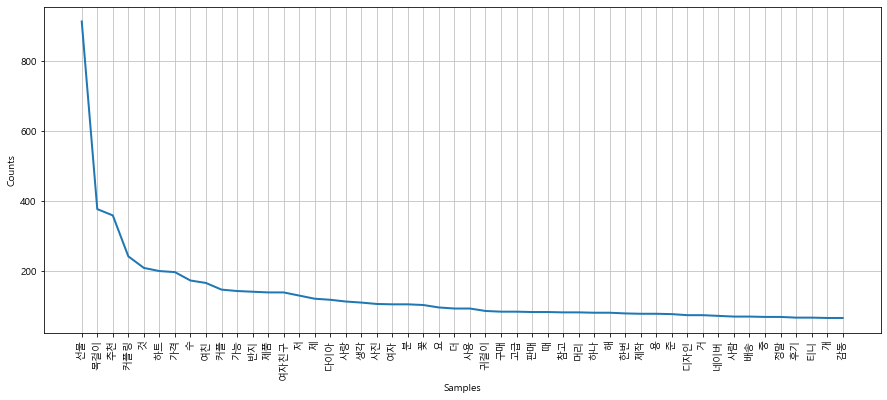

In [20]:
import nltk
gf_gift = nltk.Text(new_gift_text, name='여친 선물')
plt.figure(figsize=(15,6))
gf_gift.plot(50)
plt.show()

In [21]:
stop_words = ['선물','추천','것','가격','여친','제품','여자친구','제','요','더','고급',
    '판매','때','참고','하나','해','한번','제작','용','준','디자인','거','네이버','사람',
    '배송','중','정말','후기','감동'
    '커플','가능','저','사랑','생각','사용','개','세대','인기','상품','직접','브랜드',
    '선택','곳','모양','마감','요즘','오늘','가지','남녀','그냥','위','페이',
    '마음','부담','남자','협찬','전','핸드','의미','변경','도움','색상','아래','포장',
    '처','조금',
    '하루','정도','처리','보시','심플','가장','여성','때문','정보',
    '독서','주소','쇼핑','링크','이니셜','기념일',
    '헤어','질문','친구','스토어','아주','할인',
    '스','이면','남','지금','센스']
new_gift_text = [word for word in new_gift_text if word not in stop_words]
new_gift_text[:10]

['반지', '목걸이', '가디건', '모자', '신지', '몇개', '투척', '클래식', '커플룩', '버핏']

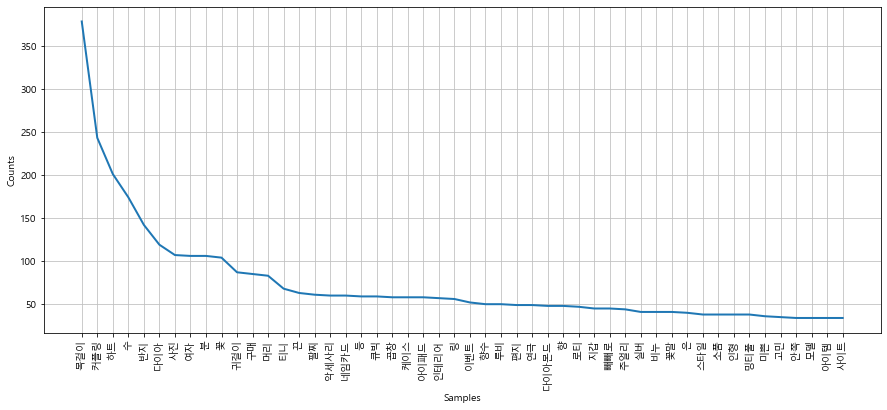

In [22]:
gf_gift = nltk.Text(new_gift_text, name='여친 선물')
plt.figure(figsize=(15,6))
gf_gift.plot(50)
plt.show()

### 워드 클라우드 그리기

In [23]:
from wordcloud import WordCloud
from PIL import Image
import numpy as np

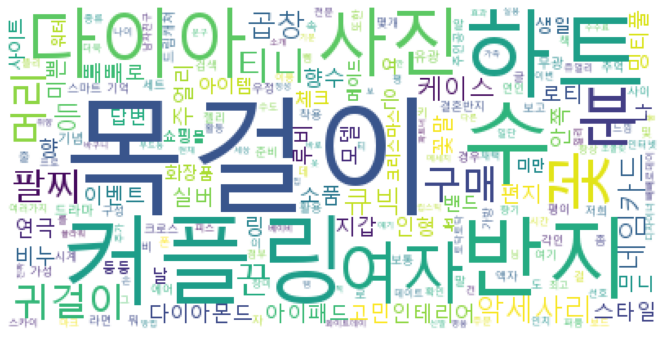

In [24]:
data = gf_gift.vocab().most_common(300)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(12,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [25]:
mask = np.array(Image.open('./data/heart.jpg'))

from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

In [26]:
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
               relative_scaling = 0.3, mask=mask,
               background_color = 'white',
               min_font_size=1,
               max_font_size=100).generate_from_frequencies(dict(data))

default_colors = wordcloud.to_array()

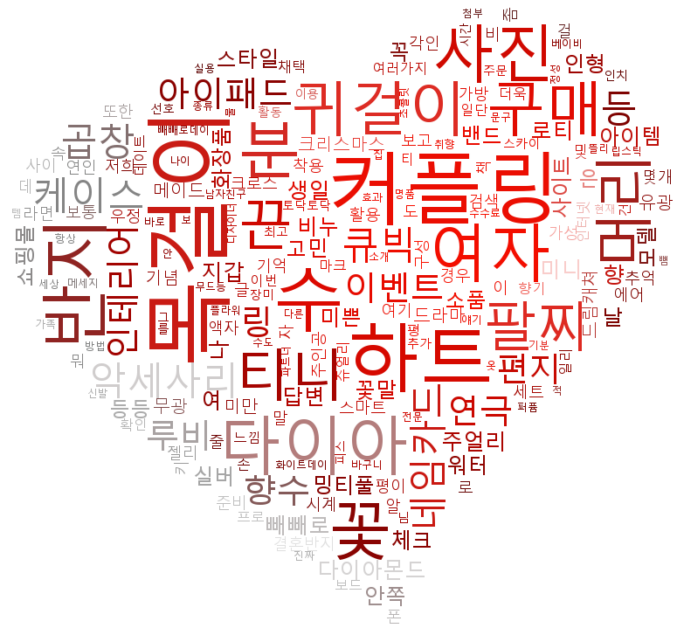

In [27]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()